In [1]:
#pip install scikit-learn
! pip install pandas


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import  fetch_openml


In [3]:
# Load MNIST dataset (70000 images of 28x28 pixels)
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.to_numpy().astype(np.float32)
y = mnist.target.astype(int)

print("Data shape:", X.shape)


Data shape: (70000, 784)


In [4]:
# Normalize pixel values between 0 and 1
X /= 255.0

# Subtract mean (center the data)
mean = np.mean(X, axis=0)
X_centered = X - mean

# Compute covariance matrix
cov_matrix = np.cov(X_centered, rowvar=False)
print("Covariance matrix shape:", cov_matrix.shape)

eigvals, eigvecs = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

k = 100
W = eigvecs[:, :k]  # projection matrix

# Project centered data onto top k eigenvectors
X_pca = X_centered @ W

print("Reduced data shape:", X_pca.shape)


Covariance matrix shape: (784, 784)
Reduced data shape: (70000, 100)


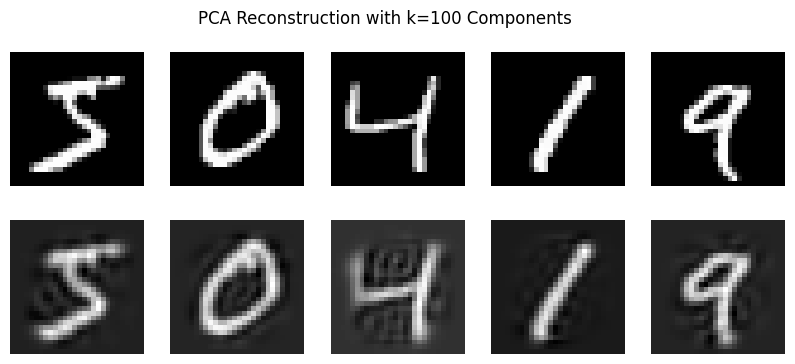

In [5]:
# Reconstruct using top k components
X_reconstructed = X_pca @ W.T + mean

# Display original vs reconstructed
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    plt.subplot(2, n, i+1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # Reconstructed
    plt.subplot(2, n, i+1+n)
    plt.imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.suptitle(f"PCA Reconstruction with k={k} Components")
plt.show()
